In [65]:
import pickle 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from itertools import product

model_data = pickle.load(open("projek.sav", "rb"))
df = model_data["df"]
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.889107,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,44831.869873,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [66]:
X = df.drop(['Potability'], axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30]
}

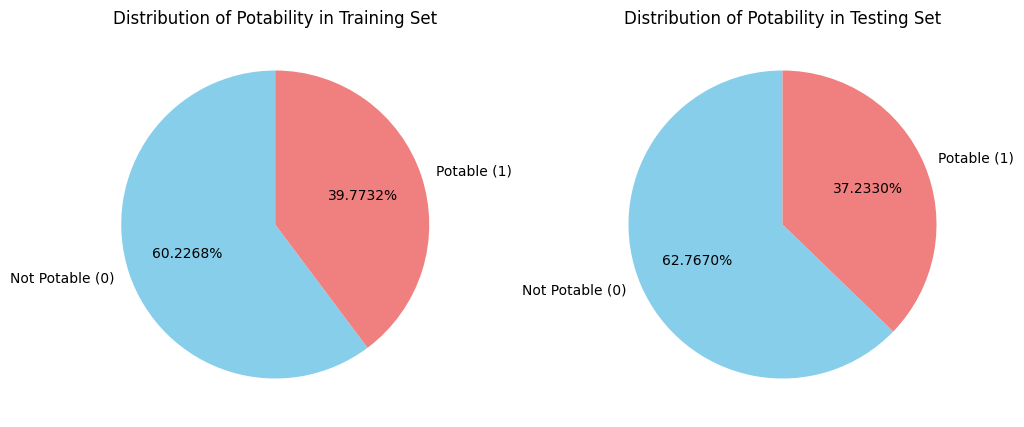

In [67]:
# Menampilkan pie chart untuk distribusi kelas pada set pelatihan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
labels_train = ['Not Potable (0)', 'Potable (1)']
sizes_train = [y_train.value_counts()[0], y_train.value_counts()[1]]
colors_train = ['skyblue', 'lightcoral']

plt.pie(sizes_train, labels=labels_train, colors=colors_train, autopct='%1.4f%%', startangle=90)
plt.title('Distribution of Potability in Training Set')

# Menampilkan pie chart untuk distribusi kelas pada set pengujian
plt.subplot(1, 2, 2)
labels_test = ['Not Potable (0)', 'Potable (1)']
sizes_test = [y_test.value_counts()[0], y_test.value_counts()[1]]
colors_test = ['skyblue', 'lightcoral']

plt.pie(sizes_test, labels=labels_test, colors=colors_test, autopct='%1.4f%%', startangle=90)
plt.title('Distribution of Potability in Testing Set')

plt.show()

In [68]:
def get_param_combinations(param_grid):
    keys, values = zip(*param_grid.items())
    combinations = [dict(zip(keys, v)) for v in product(*values)]
    return combinations

# Mendapatkan semua kombinasi parameter
param_combinations = get_param_combinations(param_grid)

# Dictionary untuk menyimpan skor
scores = {
    'params': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}
trained_models = []
# Latih model untuk setiap kombinasi parameter dan simpan skor
for params in param_combinations:
    model = RandomForestClassifier(**params, random_state=0)
    model.fit(X_train, y_train)
    trained_models.append(model)
    y_pred = model.predict(X_test)
    
    scores['params'].append(str(params))
    scores['accuracy'].append(accuracy_score(y_test, y_pred))
    scores['precision'].append(precision_score(y_test, y_pred, zero_division=0))
    scores['recall'].append(recall_score(y_test, y_pred, zero_division=0))
    scores['f1'].append(f1_score(y_test, y_pred, zero_division=0))

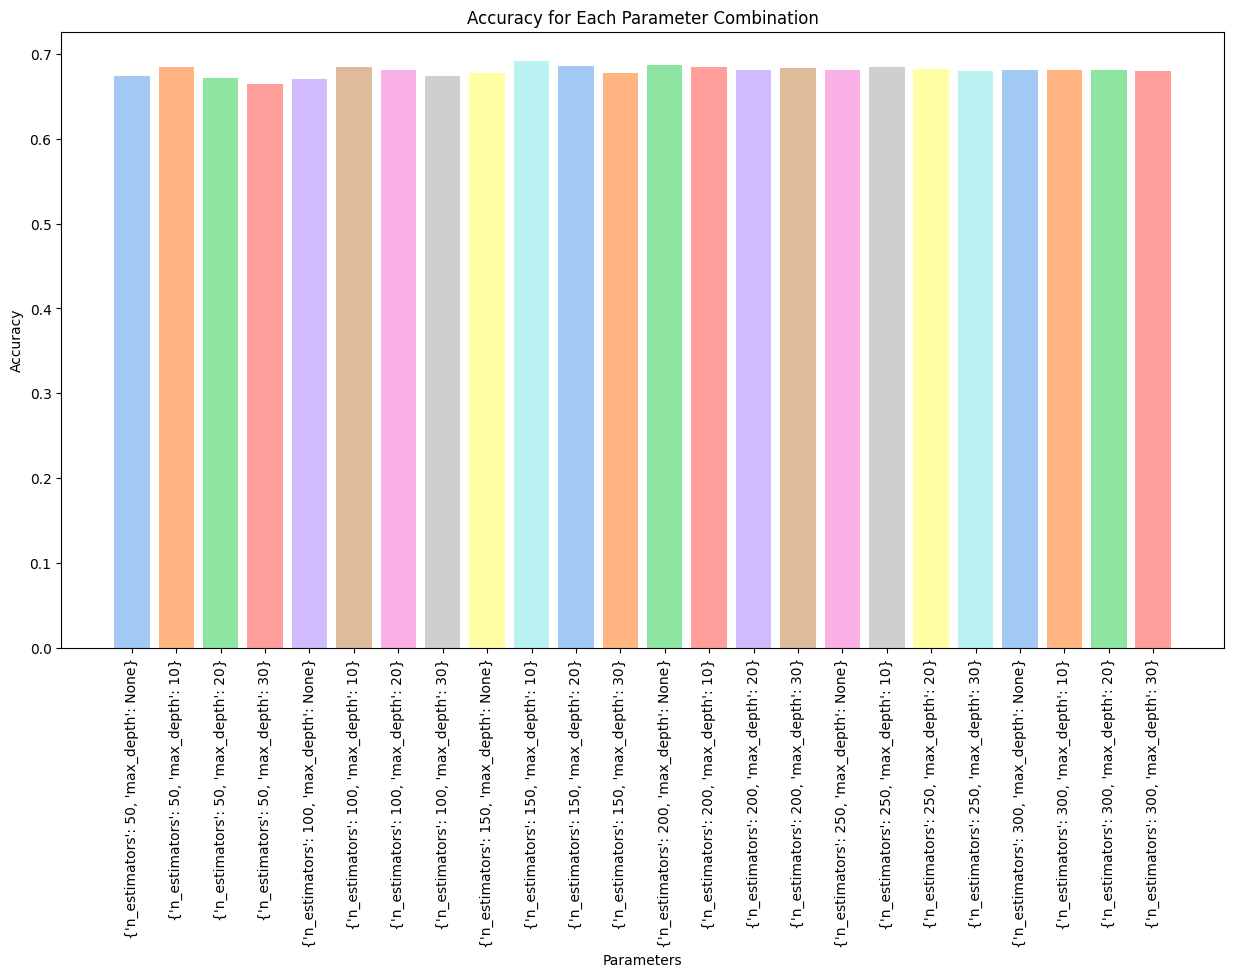

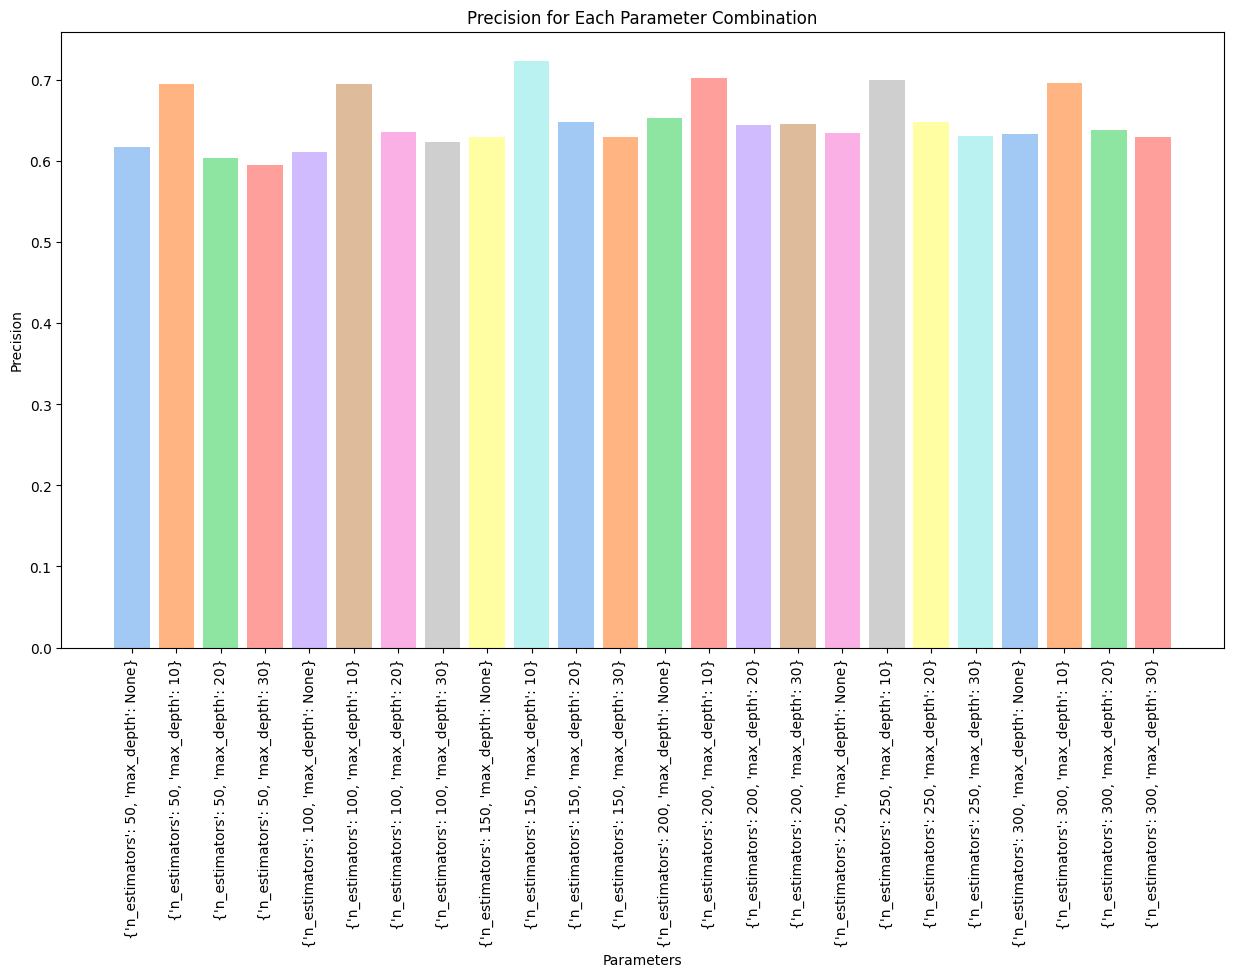

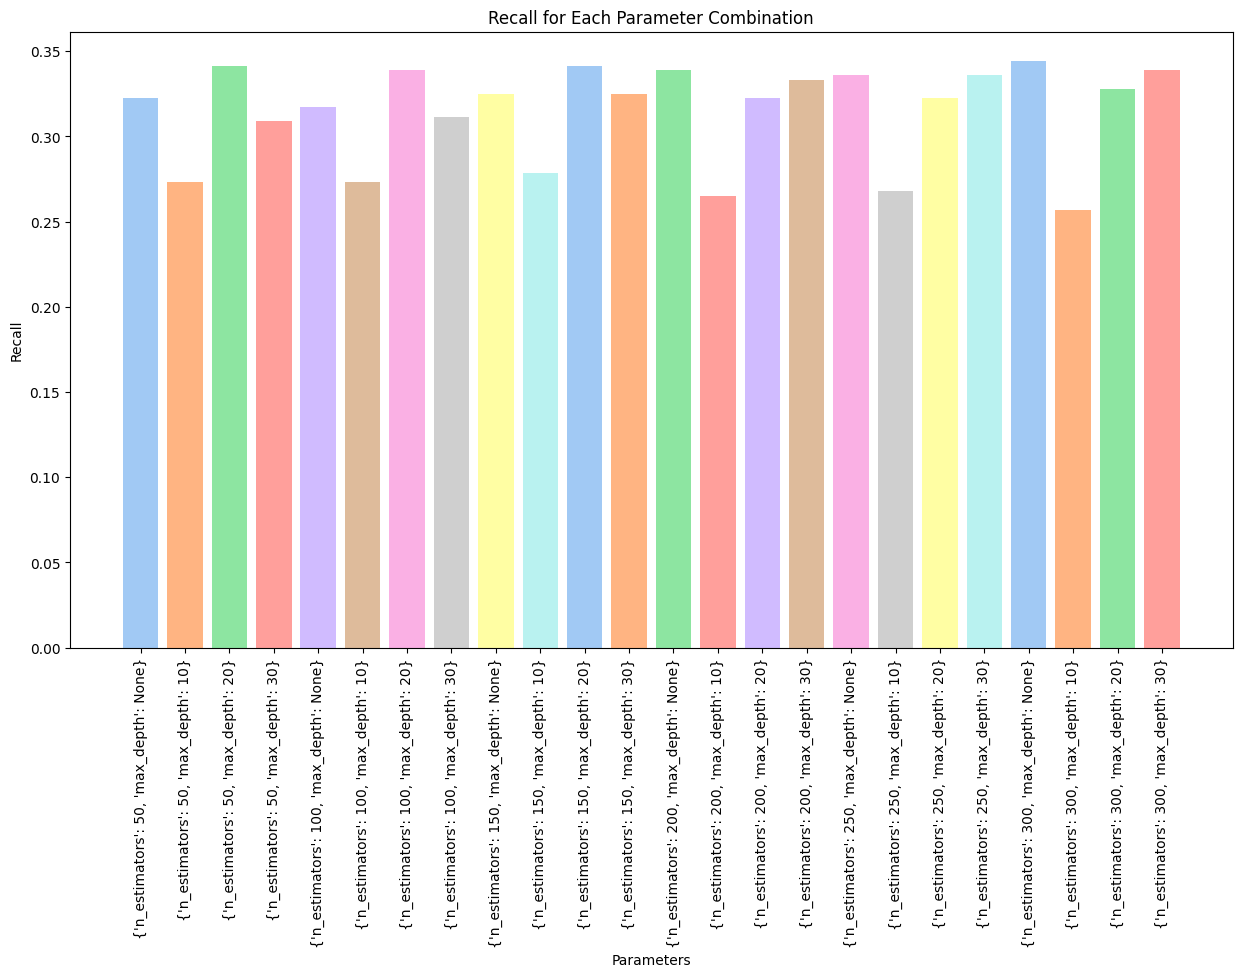

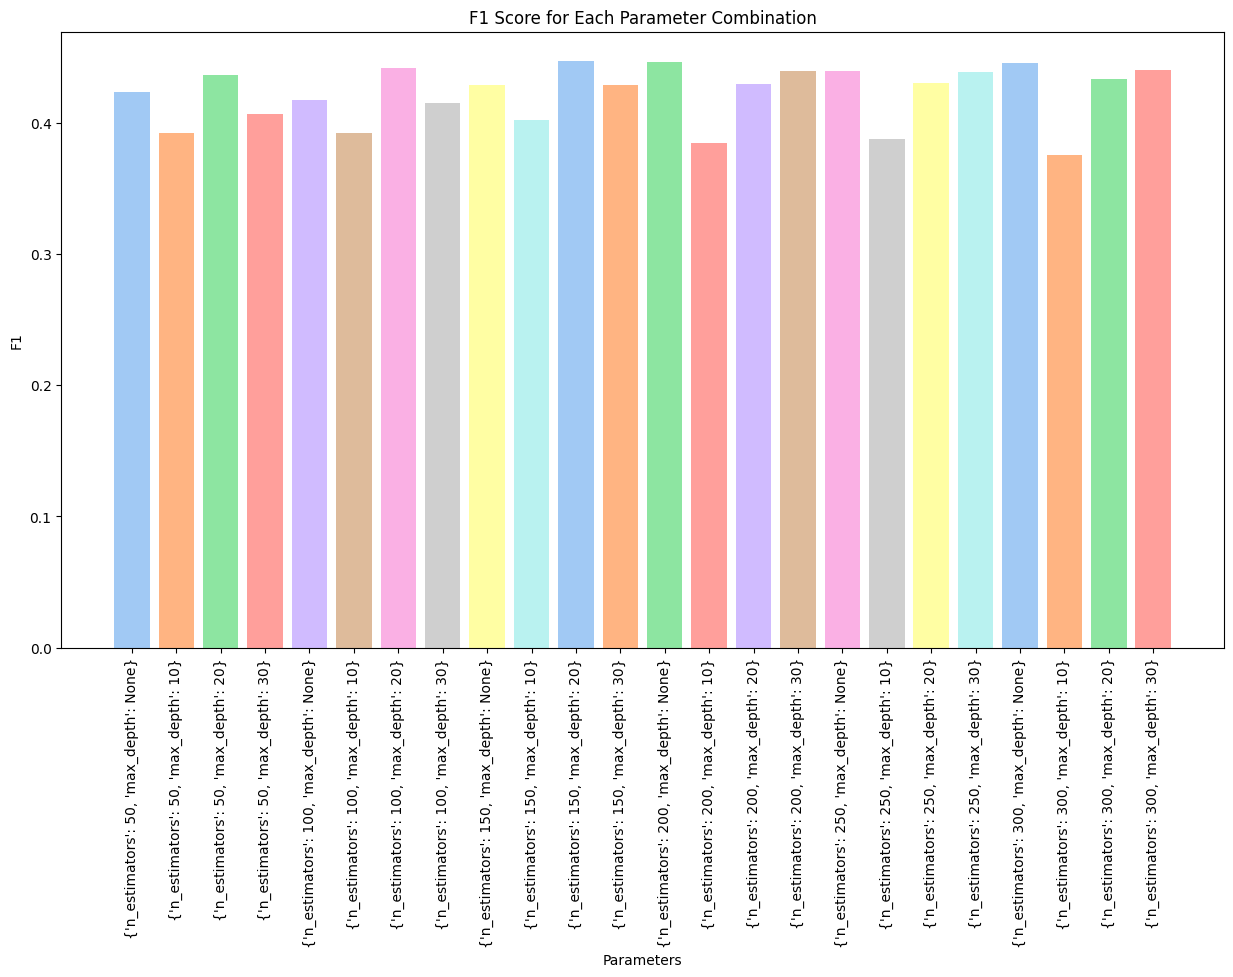

In [69]:
# Fungsi untuk membuat bar chart
import seaborn as sns
palette = sns.color_palette("pastel", len(scores['params']))
def create_bar_chart(scores, metric, title,palette):
    plt.figure(figsize=(15, 8))
    plt.bar(scores['params'], scores[metric], color=palette)
    plt.xlabel('Parameters')
    plt.ylabel(metric.capitalize())
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Membuat bar chart untuk setiap metrik
create_bar_chart(scores, 'accuracy', 'Accuracy for Each Parameter Combination',palette)
create_bar_chart(scores, 'precision', 'Precision for Each Parameter Combination',palette)
create_bar_chart(scores, 'recall', 'Recall for Each Parameter Combination',palette)
create_bar_chart(scores, 'f1', 'F1 Score for Each Parameter Combination',palette)

In [70]:
# Menemukan dan menampilkan best model
best_index = np.argmax(scores['accuracy'])

# Menyimpan semua metrik evaluasi dari model terbaik ke dalam satu variabel
best_model_metrics = {
    'best_parameters': scores['params'][best_index],
    'accuracy': scores['accuracy'][best_index],
    'precision': scores['precision'][best_index],
    'recall': scores['recall'][best_index],
    'f1_score': scores['f1'][best_index]
}

# Menampilkan metrik dari model terbaik
print("Best Model Metrics:")
for key, value in best_model_metrics.items():
    print(f"{key}: {value}")


Best Model Metrics:
best_parameters: {'n_estimators': 150, 'max_depth': 10}
accuracy: 0.6917599186164801
precision: 0.723404255319149
recall: 0.2786885245901639
f1_score: 0.40236686390532544


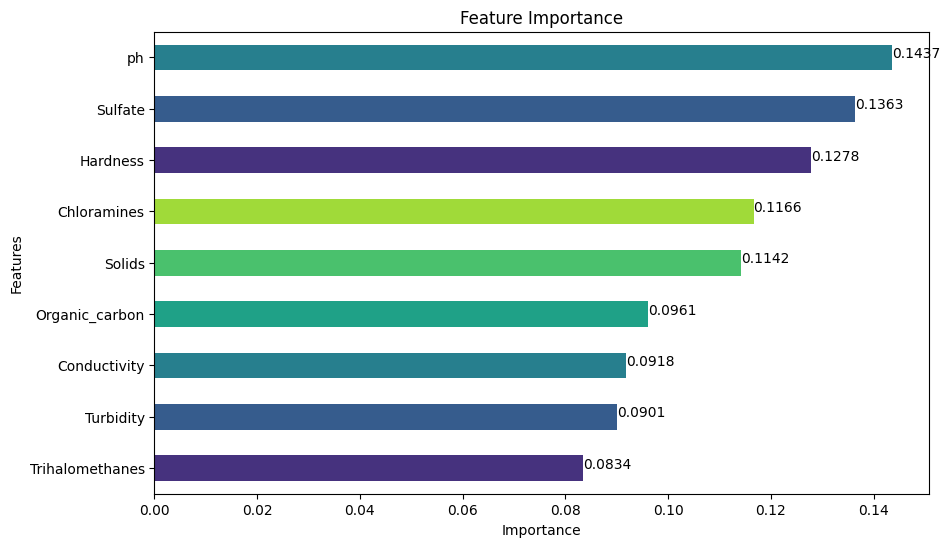

In [71]:
best_model = trained_models[best_index]

# Visualisasi fitur kepentingan
model_ranks = pd.Series(best_model.feature_importances_, index=X_train.columns, name="Importance").sort_values()
# Membuat bar plot dengan palet warna pastel
palette = sns.color_palette('viridis')
ax = model_ranks.plot(kind='barh', figsize=(10, 6), color=palette)  
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
# Menambahkan label angka di setiap bar
for i, v in enumerate(model_ranks):
    ax.text(v, i, f'{v:.4f}', color='black')
plt.show()

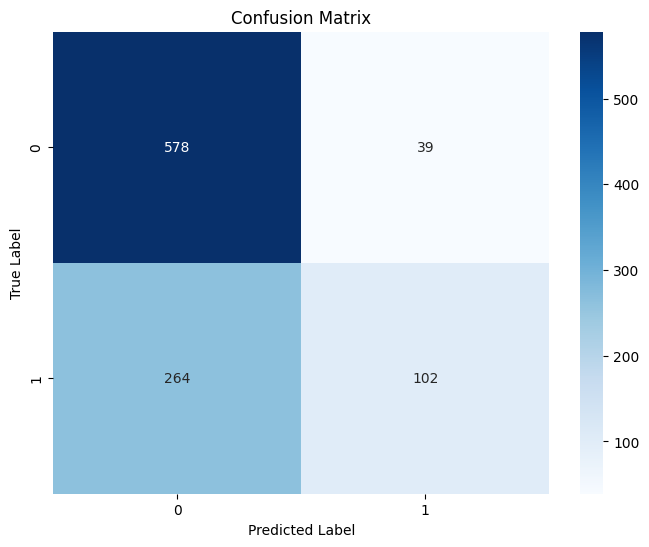

C:\Users\Airlangga\AppData\Local\Temp\ipykernel_29408\216371889.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette="pastel")


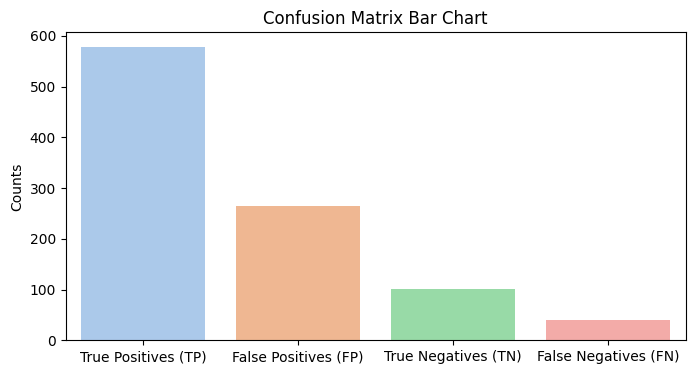

              precision    recall  f1-score   support

           0       0.69      0.94      0.79       617
           1       0.72      0.28      0.40       366

    accuracy                           0.69       983
   macro avg       0.70      0.61      0.60       983
weighted avg       0.70      0.69      0.65       983



In [72]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = best_model.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Mendapatkan TP, FP, FN, dan TN
tp, fn, fp, tn = cm.ravel()

# Nama kategori
categories = ['True Positives (TP)', 'False Positives (FP)', 'True Negatives (TN)', 'False Negatives (FN)']

# Jumlah untuk setiap kategori
counts = [tp, fp, tn, fn]

# Membuat bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=categories, y=counts, palette="pastel")
plt.title("Confusion Matrix Bar Chart")
plt.ylabel("Counts")
plt.show()

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

C:\Users\Airlangga\AppData\Local\Temp\ipykernel_29408\2197536329.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Correct', data=df_errors, palette='pastel')


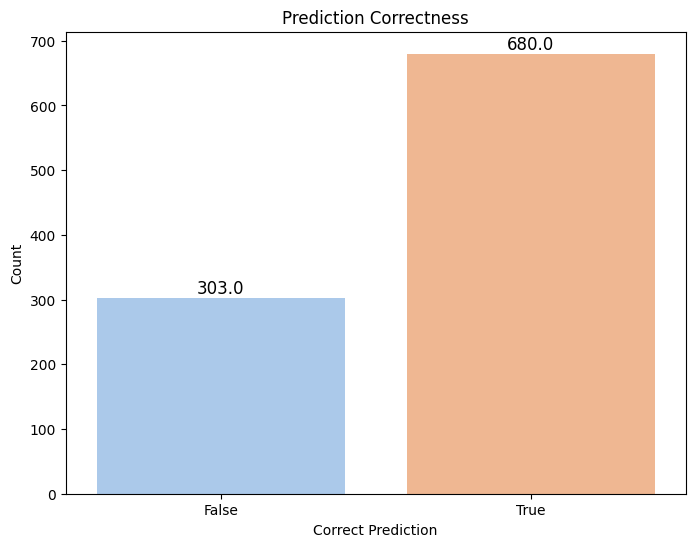

In [73]:
df_errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Correct': y_test == y_pred})

# Create a bar plot of prediction correctness
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct', data=df_errors, palette='pastel')
plt.title('Prediction Correctness')
plt.xlabel('Correct Prediction')
plt.ylabel('Count')

# Add actual values on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

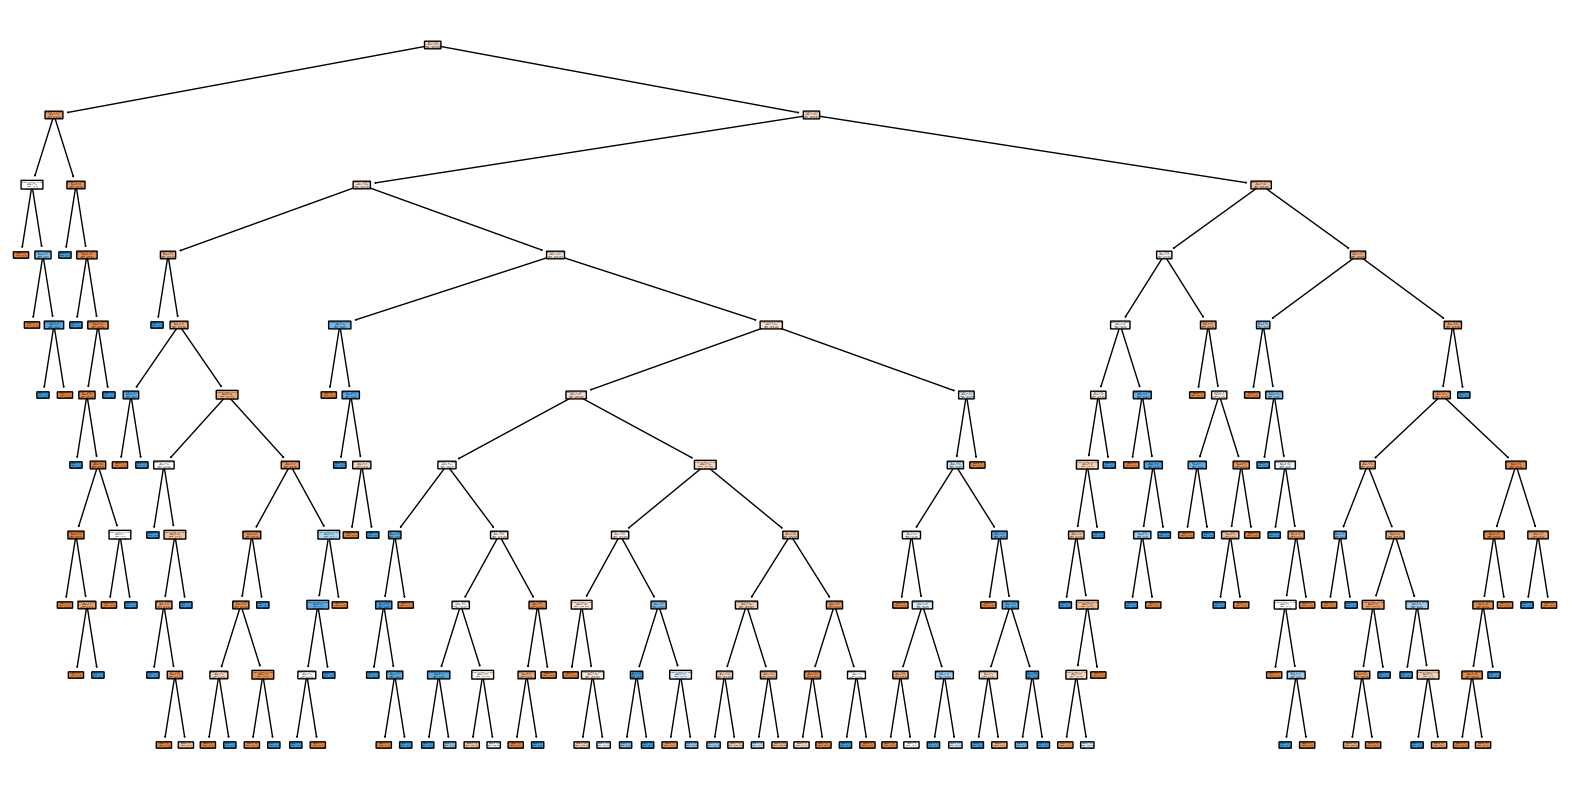

In [74]:
from sklearn.tree import plot_tree
# Visualisasi pohon keputusan (hanya menunjukkan satu pohon, bukan keseluruhan ensemble)
plt.figure(figsize=(20, 10))
plot_tree(best_model.estimators_[0], feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True,max_depth=best_model.max_depth)
plt.show()

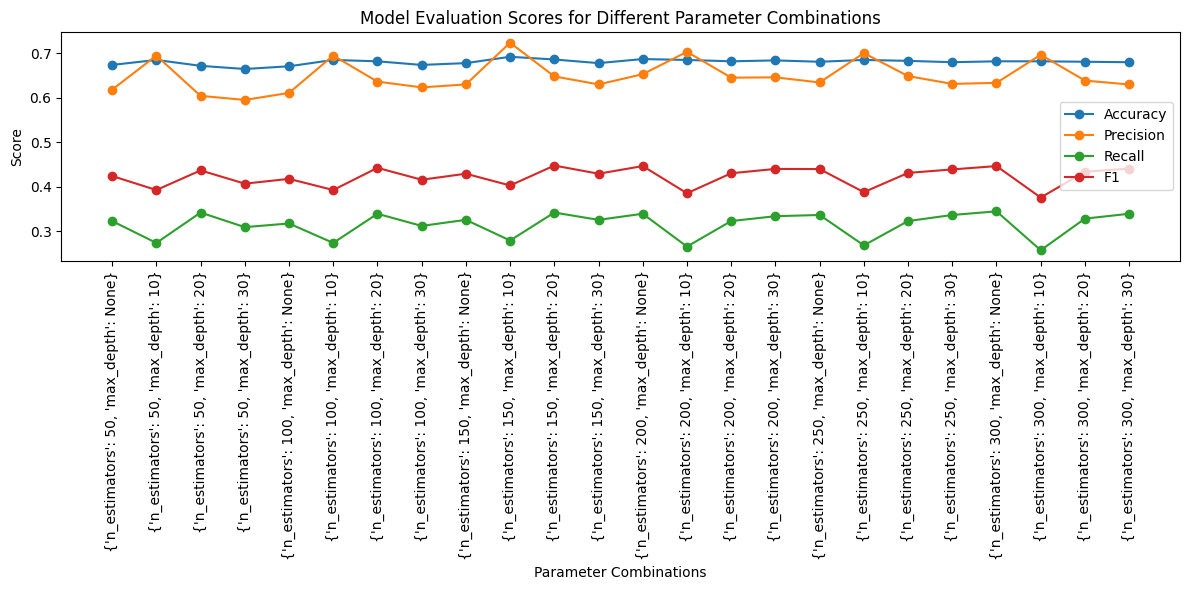

In [76]:
# Membuat line plot untuk melihat perubahan skor dari tiap model evaluasi
plt.figure(figsize=(12, 6))

# Metrik evaluasi yang akan diplot
metrics = ['accuracy', 'precision', 'recall', 'f1']

for metric in metrics:
    plt.plot(scores['params'], scores[metric], label=metric.capitalize(), marker='o')

plt.title('Model Evaluation Scores for Different Parameter Combinations')
plt.xlabel('Parameter Combinations')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [75]:
best_model_accuracy = best_model_metrics['accuracy']
best_model_accuracy

# Save the model and scaler
skema2 = {'model2': best_model_metrics}
filename = 'skema2.sav'
pickle.dump(skema2, open(filename, 'wb'))